In [426]:
import requests
url = "https://www.wykop.pl/mikroblog/"
strona = requests.get(url)

In [427]:
from bs4 import BeautifulSoup
strona_p = BeautifulSoup(strona.text, "html.parser")
print(strona_p)

<!DOCTYPE HTML>

<html>
<head>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1.0" name="viewport"/>
<title>Mikroblog - Wykop.pl</title>
<meta content="follow, index" name="robots">
<meta content="text/html; charset=utf-8" http-equiv="Content-Type">
<meta content="pl" http-equiv="Content-Language"/>
<meta content="Wykop jest miejscem, gdzie gromadzimy najciekawsze informacje z Sieci: newsy, artykuły, linki. O treści serwisu decydują tylko i wyłącznie nasi użytkownicy, dodając newsy, komentując i głosując na nie." name="description"/>
<meta content="Newsy, Aktualności, Gry komputerowe, Super filmiki, Wiadomości, Ciekawostki, Filmiki z humorem, śmieszne filmy, Muzyka na codzień" name="keywords"/>
<meta content="" name="verify-v1"/>
<meta content="V4MUQ9RWTEmDapezxuye8fqvShDIixA1oYzAytVf-ys" name="google-site-verification"/>
<meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
<link href="https://plus.google.com/103563347525706677989/" rel="publisher"/

In [428]:
wpisy = strona_p.select(".dC")
print(wpisy[2])



<div class="wblock lcontrast dC" data-id="135200425" data-type="entrycomment">
<a name="comment-135200425" style="position: relative; top: -120px"> </a>
<a class="profile" href="https://www.wykop.pl/ludzie/C_H_M_I_E_L_U/" title=""><img alt="" class="avatar lazy" src="https://www.wykop.pl/cdn/c3397992/C_H_M_I_E_L_U_0LTdXNVKxW,q40.jpg"/></a>
<div>
<div class="author ellipsis">
<a class="color-1 showProfileSummary" href="https://www.wykop.pl/ludzie/C_H_M_I_E_L_U/" title=""><b>C_H_M_I_E_L_U</b></a>
<a href="https://www.wykop.pl/wpis/38478729/#comment-135200425"><small class="affect"><time datetime="2019-01-23T14:00:34+01:00" pubdate="" title="2019-01-23 14:00:34">9 godz. temu</time></small></a>
<small class="affect"></small>
<p class="vC" data-vc="115" data-vcm="0" data-vcp="0">
<b class=""><span class="c2a7017">+115</span></b>
<i class="fa fa-bookmark favourite red"></i>
</p>
</div>
<div class="text">
<p>

            @<a class="showProfileSummary" href="https://www.wykop.pl/ludzie/BajanA

In [430]:
autor = wpisy[2].find(attrs={'class':'color-1 showProfileSummary'}).get_text()
data = wpisy[2].find(attrs={'class':'affect'}).time['title']
plec = wpisy[2].find(attrs={'class':'profile'}).img['class'][1]
kolor = wpisy[2].find(attrs={'class':'author ellipsis'}).a['class'][0]
plusy = wpisy[2].find(attrs={'class':'vC'}).get_text()
tekst = wpisy[2].find(attrs={'class':'text'}).p.get_text()
typ = wpisy[2]['data-type']
unikalny_nr = wpisy[2]['data-id']
print("autor: ", autor, "\n", "data: ", data,"\n", "płeć: ", plec,"\n", "kolor: ", kolor,"\n", "liczba plusów: ", plusy,"\n", "treść: ", tekst,"\n", "post/komentarz: ", typ, "\n", "id: ", unikalny_nr)

autor:  C_H_M_I_E_L_U 
 data:  2019-01-23 14:00:34 
 płeć:  lazy 
 kolor:  color-1 
 liczba plusów:  
+115

 
 treść:  

            @BajanArt: oj będzie lekko ponad 2000 plusików ( ͡° ͜ʖ ͡°)                			 
 post/komentarz:  entrycomment 
 id:  135200425


In [431]:
linki = []
for i in range(1,50,1):
    linki.append("https://www.wykop.pl/mikroblog/hot/strona/{}".format(i))
    
strony = []
for l in linki:
    strony.append(requests.get(l))

In [432]:
strony_t = []
for s in strony:
    strony_t.append(s.text)

strony_p = []
for s_t in strony_t:
    strony_p.append(BeautifulSoup(s_t, "html.parser"))

listy = []
for s_p in strony_p:
    listy.append(s_p.select(".dC"))
    
from itertools import chain
lista = chain.from_iterable(listy) #łączenie w jedną wielką listę

tresci = []
for l in lista:
    try:
        autor = l.find(attrs={'class':'color-1 showProfileSummary'}).get_text()
        data = l.find(attrs={'class':'affect'}).time['title']
        plec = l.find(attrs={'class':'profile'}).img['class'][1]
        kolor = l.find(attrs={'class':'author ellipsis'}).a['class'][0]
        plusy = l.find(attrs={'class':'vC'}).get_text()
        tekst = l.find(attrs={'class':'text'}).p.get_text()
        typ = l['data-type']
        unikalny_nr = l['data-id']
        pom = {"autor":autor, "data":data, "plec":plec, "kolor":kolor, "plusy":plusy, "tekst":tekst, "typ":typ, "id":unikalny_nr}
        tresci.append(pom)
    except:
        pass


In [437]:
print(len(tresci)) # coś mało
print(len(listy[17])) # tylko 3 bo pobiera z panelu bocznego trzy proponowane wpisy. reszty nie ma...

412
3


In [67]:
import pandas as pd
dane = pd.DataFrame(tresci)
dane.head(11)

,autor,data,id,kolor,plec,plusy,tekst,typ
0,bobok,2019-01-22 17:39:29,38461893,color-1,male,\n+3320\n\n,"\n\n Z racji, że minęło mi już 10 l...",entry
1,bkwas,2019-01-22 17:50:44,135123705,color-1,male,\n+623\n\n,\n\n @bobok no ewidentnie #patostre...,entrycomment
2,Kus44,2019-01-22 17:50:52,135123725,color-1,male,\n+970\n\n,"\n\n No to banujemy #rozowepaski, t...",entrycomment
3,Tboom,2019-01-22 20:52:52,38465623,color-1,male,\n+1755\n\n,\n\n Mirabelki i Mirki. Taka krótka...,entry
4,Suheil-al-Hassan,2019-01-22 20:54:45,135141323,color-1,male,\n+822\n\n,\n\n @Tboom: Co by tu powiedzieć......,entrycomment
5,Meseser,2019-01-22 13:49:57,38458339,color-1,male,\n+2348\n\n,\n\n Mieszkam z dwoma różowymi: moj...,entry
6,rewter,2019-01-22 14:17:18,135106279,color-1,lazy,\n+1365\n\n,\n\n @Meseser: Będzie awantura dlac...,entrycomment
7,temokkor,2019-01-22 17:12:15,135120517,color-1,male,\n+938\n\n,\n\n @Meseser obstawiam że Ci nie u...,entrycomment
8,rakamakafon,2019-01-22 18:51:11,38463221,color-1,male,\n+2743\n\n,\n\n Pora na CSa( ͡° ͜ʖ ͡°)\n#hehes...,entry
9,rakamakafon,2019-01-22 18:53:43,135129487,color-1,male,\n+522\n\n,\n\n @Prokurator1990: za moją potró...,entrycomment


In [68]:
from selenium import webdriver
driver = webdriver.Chrome(r"C:\Users\Tomasz\Desktop\chromedriver.exe")
driver.get("https://www.wykop.pl/mikroblog/najnowsze")

In [70]:
from selenium.webdriver.common.keys import Keys
import time
elm = driver.find_element_by_tag_name("html")

for i in range(1,100,1):
    elm.send_keys(Keys.END)
    time.sleep(1)
source_data2 = driver.page_source

In [72]:
soup = BeautifulSoup(source_data2, "html.parser")

In [73]:
wpisy_24 = soup.select(".dC")

In [75]:
przetworzone_wpisy_24 = []
for w in wpisy_24:
    try:
        autor = w.find(attrs={'class':'color-1 showProfileSummary'}).get_text()
        data = w.find(attrs={'class':'affect'}).time['title']
        plec = w.find(attrs={'class':'profile'}).img['class'][1]
        kolor = w.find(attrs={'class':'author ellipsis'}).a['class'][0]
        plusy = w.find(attrs={'class':'vC'}).get_text()
        tekst = w.find(attrs={'class':'text'}).p.get_text()
        typ = w['data-type']
        unikalny_nr = w['data-id']
        pom = {"autor":autor, "data":data, "plec":plec, "kolor":kolor, "plusy":plusy, "tekst":tekst, "typ":typ, "id":unikalny_nr}
        przetworzone_wpisy_24.append(pom)
    except:
        pass

In [455]:
#dane2 = pd.DataFrame(przetworzone_wpisy_24)
#dane.to_csv("dane.csv")
#dane2.to_csv("dane2.csv")
dane2 = pd.read_csv("dane2.csv")
dane2.drop(columns =["Unnamed: 0", "kolor"], inplace = True) #jak się potem okazało, zmienna kolor jest nieprzydatna

In [439]:
dane2.head(10)


,autor,data,id,plec,plusy,tekst,typ
0,Side_One,2019-01-23 01:27:22,38471389,male,0,\r\n\r\n Nie będzie problemu z zabo...,entry
1,mynameisbob,2019-01-23 01:27:15,38471385,male,0,\r\n,entry
2,picasssss1,2019-01-23 01:27:15,38471387,male,0,\r\n\r\n Prawie mamy to! teraz tylk...,entry
3,1rowerblazeja,2019-01-23 01:27:14,38471383,male,0,\r\n,entry
4,CHI77OUT,2019-01-23 01:27:09,38471381,male,0,\r\n\r\n Nie zapomnij zostawić łapę...,entry
5,bazylo,2019-01-23 01:27:08,38471379,male,0,\r\n\r\n beka z wykopu ...,entry
6,teraflu_zatoki,2019-01-23 01:27:03,38471377,male,1,\r\n\r\n idę se już ...,entry
7,71393,2019-01-23 01:26:49,38471375,male,2,\r\n\r\n ( ͡º ͜ʖ͡º) elo ...,entry
8,Mibik,2019-01-23 01:26:44,38471371,male,1,\r\n\r\n Da się wyleczyć bordera? ...,entry
9,Antidolum,2019-01-23 01:26:44,38471373,male,2,"\r\n\r\n Dobranoc, mam nadzieję ze ...",entry


In [456]:
dane2.loc[dane2.plec=="lazy", "plec"]="brak"
dane2.loc[dane2.plec=="male", "plec"]="mezczyzna"
dane2.loc[dane2.plec=="female", "plec"]="kobieta"
dane2.head(10)

,autor,data,id,plec,plusy,tekst,typ
0,Side_One,2019-01-23 01:27:22,38471389,mezczyzna,0,\r\n\r\n Nie będzie problemu z zabo...,entry
1,mynameisbob,2019-01-23 01:27:15,38471385,mezczyzna,0,\r\n,entry
2,picasssss1,2019-01-23 01:27:15,38471387,mezczyzna,0,\r\n\r\n Prawie mamy to! teraz tylk...,entry
3,1rowerblazeja,2019-01-23 01:27:14,38471383,mezczyzna,0,\r\n,entry
4,CHI77OUT,2019-01-23 01:27:09,38471381,mezczyzna,0,\r\n\r\n Nie zapomnij zostawić łapę...,entry
5,bazylo,2019-01-23 01:27:08,38471379,mezczyzna,0,\r\n\r\n beka z wykopu ...,entry
6,teraflu_zatoki,2019-01-23 01:27:03,38471377,mezczyzna,1,\r\n\r\n idę se już ...,entry
7,71393,2019-01-23 01:26:49,38471375,mezczyzna,2,\r\n\r\n ( ͡º ͜ʖ͡º) elo ...,entry
8,Mibik,2019-01-23 01:26:44,38471371,mezczyzna,1,\r\n\r\n Da się wyleczyć bordera? ...,entry
9,Antidolum,2019-01-23 01:26:44,38471373,mezczyzna,2,"\r\n\r\n Dobranoc, mam nadzieję ze ...",entry


In [457]:
dane2.loc[dane2.typ=="entry", "typ"]="wpis"
dane2.loc[dane2.typ=="entrycomment", "typ"]="komentarz"

In [443]:
pd.value_counts(dane2.typ)

komentarz    10533
wpis          8515
Name: typ, dtype: int64

In [444]:
pd.value_counts(dane2.plec)

mezczyzna    14363
brak          2538
kobieta       2147
Name: plec, dtype: int64

In [458]:
dane2['data'] = pd.to_datetime(dane2.data) #kolumnę data zapisuję w odpowiednim formacie
dane2.set_index('data', inplace=True) #ustawiam ją jako indeks

typ_ = dane2.groupby(["typ"]) #grupuję dane po typie - chcę mieć zależność tylko wpisów i czasu
typ_wpis = typ_.get_group("wpis") #wybieram wpisy
y=typ_wpis.resample("H")["id"].count() #dzięki temu, że indeksem jest teraz data, mogę użyć metody resample
#dzięki temu mogę łatwo pogrupować dane w pożadane interwały czasowe. Tutaj "H" oznacza godziny
#odnoszę się do konkretnej kolumny, żeby otrzymać tylko jedną kolumną wyników

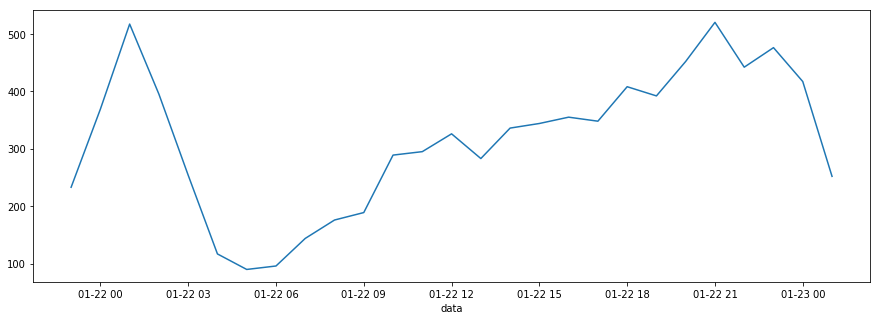

In [480]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

matplotlib.rcParams['figure.figsize'] = (15, 5)
sns.lineplot(y.index, y.values)
plt.show()


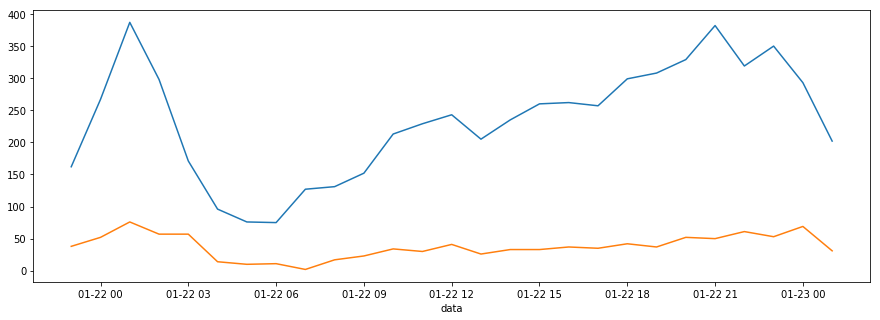

In [483]:
typ_wpis_=typ_wpis.groupby(["plec"])
typ_wpis_k=typ_wpis_.get_group("kobieta")
typ_wpis_m=typ_wpis_.get_group("mezczyzna")
k=typ_wpis_k.resample("H")["id"].count()
m=typ_wpis_m.resample("H")["id"].count()

matplotlib.rcParams['figure.figsize'] = (15, 5)
sns.lineplot(m.index, m.values)
sns.lineplot(k.index, k.values)
plt.show()


In [511]:
import re

def moj_parser(s, wynik): #s - pojedynczy wpis. wynik - lista do której będziemy dopisywać słowa
    tymczasowe = []
    s.replace("\n"," ")
    pom = s.split(" ") #dzielimy treść wpisu na słowa
    for p in pom: #w każdym słowie
        p = re.sub('[^\w\s]','',p) #matchuje wszystko POZA zwykłymi litreami i pustym miejscem
        p = re.sub('[^\S\S]',' ',p) #matchuje wszystko POZA dwoma niepustymi znakami - problem \n\n
        for pp in (p.split(" ")):
            if(len(p)>3): #odrzucam krótkie i nieistotne słowa
                tymczasowe.append(p)
    for t in tymczasowe: #jeszcze jedna pętla - problem \n\n
        pom2 =t.split(" ")
        for p in pom2:
            if (len(p)>3):
                wynik.append(p.lower()) #zeby nie traktowalo oddzielnie słow zapisany wielkimi i małymi literami
    return;

        

In [513]:
slownik = []
for w in dane2.tekst:
    moj_parser(w,slownik)

Słów:  289903
Unikalnych słów:  68195
Najpopularniejsze słowa to: 
 danielmagical       1356
cena                1183
link                1063
patostreamy          840
gownowpis            803
kupony               784
heheszki             751
pytanie              649
wiem                 610
chcesz               537
przegryw             510
youtubeshore         476
xiaomi               432
muzyka               425
najniższa            416
dnia                 397
mirki                385
cebulaonlinelive     382
kupon                379
masz                 366
dtype: int64


<BarContainer object of 20 artists>

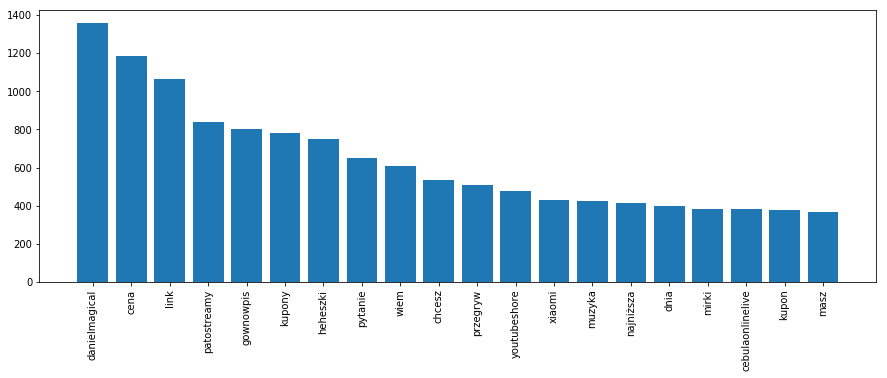

In [523]:

stopwords = ("pokaż całość spoiler a aby ach acz aczkolwiek aj albo ale alez ależ ani az aż bardziej bardzo jakieś beda bedzie bez deda będą bede będę będzie bo bowiem by byc chyba być byl byla byli bylo byly był była było były bynajmniej cala cali caly cała cały ci cie ciebie cię co cokolwiek cos coś czasami czasem czemu czy czyli daleko dla dlaczego dlatego do dobrze kurwa temu dokad dokąd dosc dość duzo dużo dwa dwaj dwie dwoje dzis dzisiaj dziś gdy gdyby gdyz gdyż gdzie gdziekolwiek gdzies gdzieś go i ich ile im inna inne inny innych iz iż ja jak jakas jakaś jakby jaki jakichs jakichś jakie jakis jakiś jakiz jakiż jakkolwiek jako jakos jakoś ją je jeden jedna jednak jednakze jednakże jedno jego jej jemu jesli jest jestem jeszcze jeśli jezeli jeżeli juz już kazdy każdy kiedy kilka kims kimś kto ktokolwiek ktora ktore ktorego ktorej ktory ktorych ktorym ktorzy ktos ktoś która które którego której który których którym którzy ku lat lecz lub ma mają mało mam mi miedzy między mimo mna mną mnie moga mogą moi moim moj moja moje moze mozliwe mozna może możliwe można mój mu musi my na nad nam nami nas nasi nasz nasza nasze naszego naszych natomiast natychmiast nawet nia nią nic nich nie niech niego niej niemu nigdy nim nimi niz niż no o obok od około on ona one oni ono oraz oto owszem pan pana pani po pod podczas pomimo ponad poniewaz ponieważ powinien powinna powinni powinno poza prawie przeciez przecież przed przede przedtem przez przy roku rowniez również sam sama są sie się skad skąd soba sobą sobie sposob sposób swoje ta tak taka taki takie takze także tam te tego tej ten teraz też to toba tobą tobie totez toteż totobą trzeba tu tutaj twoi twoim twoj twoja twoje twój twym ty tych tylko tym u w wam wami was wasz wasza wasze we według wiele wielu więc więcej wlasnie właśnie wszyscy wszystkich wszystkie wszystkim wszystko wtedy wy z za zaden zadna zadne zadnych zapewne zawsze ze zeby zeznowu zł znow znowu znów zostal został żaden żadna żadne żadnych że żeby  ")
stopwords = stopwords.split(" ")
slownik = [x for x in slownik if x not in stopwords]
print("Słów: ", len(slownik))
print("Unikalnych słów: ", len(pd.value_counts(slownik)))
x= pd.value_counts(slownik)[0:20]
print("Najpopularniejsze słowa to:", "\n",x)
fig = plt.subplots(1, 1, figsize=(15,5))
plt.xticks(rotation='vertical')
plt.bar(x.index, x.values)


In [560]:
import numpy as np
def moj_parser2(s): #s - pojedynczy wpis. wynik - lista do której będziemy dopisywać słowa
    tymczasowe = []
    tymczasowe2 = []
    s.replace("\n"," ")
    pom = s.split(" ") #dzielimy treść wpisu na słowa
    for p in pom: #w każdym słowie
        p = re.sub('[^\w\s]','',p) #matchuje wszystko POZA zwykłymi litreami i pustym miejscem
        p = re.sub('[^\S\S]',' ',p) #matchuje wszystko POZA dwoma niepustymi znakami - problem \n\n
        for pp in (p.split(" ")):
            if(len(p)>0): #odrzucam krótkie i nieistotne słowa
                tymczasowe.append(p)
    for t in tymczasowe: #jeszcze jedna pętla - problem \n\n
        pom2 =t.split(" ")
        for p in pom2:
            if (len(p)>0):
                tymczasowe2.append(p.lower())
    if (len(tymczasowe2) < 2):
        wynik = 0
    else:
        wynik = sum(len(t) for t in tymczasowe2)/len(tymczasowe2)
    return wynik;

In [561]:
test = dane2.tekst.apply(moj_parser2)
dane2["srednia_znakow_w_wyrazie"] = pd.Series(test)
dane2.head()

c:\users\tomasz\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:21: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.


,autor,id,plec,plusy,tekst,typ,srednia_znakow_w_wyrazie
data,,,,,,,
2019-01-23 01:27:22,Side_One,38471389,mezczyzna,0,\r\n\r\n Nie będzie problemu z zabo...,wpis,6.833333
2019-01-23 01:27:15,mynameisbob,38471385,mezczyzna,0,\r\n,wpis,0.000000
2019-01-23 01:27:15,picasssss1,38471387,mezczyzna,0,\r\n\r\n Prawie mamy to! teraz tylk...,wpis,5.157895
2019-01-23 01:27:14,1rowerblazeja,38471383,mezczyzna,0,\r\n,wpis,0.000000
2019-01-23 01:27:09,CHI77OUT,38471381,mezczyzna,0,\r\n\r\n Nie zapomnij zostawić łapę...,wpis,9.300000


In [ ]:
test2 = typ_wpis.apply(moj_parser2)

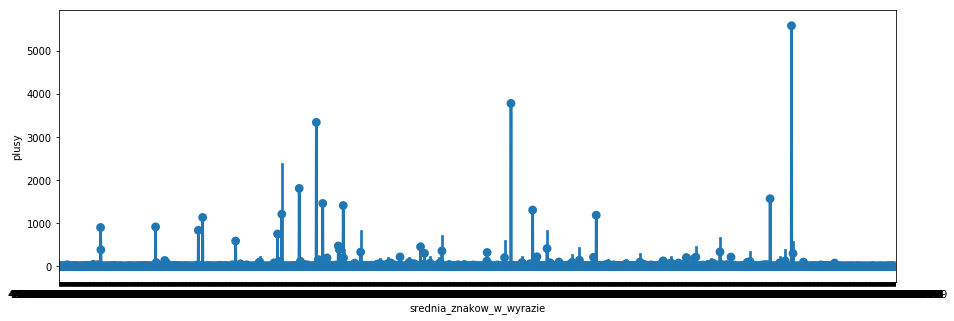

In [556]:
z = list(zip(dane2.srednia_znakow_w_wyrazie, dane2.plusy))
matplotlib.rcParams['figure.figsize'] = (15, 5)
sns.pointplot(dane2.srednia_znakow_w_wyrazie, dane2.plusy)
plt.show()

